In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

In [23]:
ev_fiyatlari = pd.read_csv('./data/ev_fiyatlari.csv')
ev_fiyatlari.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [24]:
SaleCond=pd.get_dummies(ev_fiyatlari.SaleCondition,prefix='SaleCond', drop_first=True)
SaleTyp=pd.get_dummies(ev_fiyatlari.SaleType,prefix='SaleTyp', drop_first=True)
KitchenQ=pd.get_dummies(ev_fiyatlari.KitchenQual,prefix='KitchenQ', drop_first=True)
numerik_kolonlar = [kolon for kolon in ev_fiyatlari.dtypes[ev_fiyatlari.dtypes.values == 'int64'].index 
                    if kolon not in ["Id", "SalePrice"] ]
X = ev_fiyatlari[numerik_kolonlar]

X=pd.concat([X,KitchenQ,SaleTyp,SaleCond], axis=1)
indirgenmis_kolanlar=['MSSubClass','LotArea','OverallQual','OverallCond','YearBuilt','BsmtFinSF1','TotalBsmtSF','2ndFlrSF','GrLivArea','BsmtFullBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','WoodDeckSF','ScreenPorch','PoolArea','KitchenQ_Fa','KitchenQ_Gd','KitchenQ_TA','SaleTyp_New']
X=X[indirgenmis_kolanlar]

In [25]:
Y=ev_fiyatlari.SalePrice

In [26]:
#Şimdi, verilerimizi eğitim ve test kümelerine ayırıyoruz. 
#Bunu yaparken scikit-learn'in train_test_split() metodunu kullanacağız. 

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))

Eğitim kümesindeki gözlem sayısı : 1168
Test kümesindeki gözlem sayısı   : 292


In [32]:
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train)
sonuclar = model.fit()

sonuclar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     257.4
Date:                Mon, 13 May 2019   Prob (F-statistic):               0.00
Time:                        15:52:50   Log-Likelihood:                -13772.
No. Observations:                1168   AIC:                         2.759e+04
Df Residuals:                    1145   BIC:                         2.771e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -7.819e+05   9.84e+04     -7.949      0.000   -9.75e+05   -5.89e+05
MSSubClass    -155.2131     26.888     -5.772      0.000    -207.969    -102.457
LotArea          0.4586      0.097      4.748      0.000       0.269       0.648
OverallQual   1.542e+04   1277.438     12.073      0.000    1.29e+04    1.79e+04
OverallCond   4906.1824    974.788      5.033      0.000    2993.612    6818.753
YearBuilt      389.1317     49.654      7.837      0.000     291.708     486.555
BsmtFinSF1       7.1116      3.207      2.218      0.027       0.820      13.403
TotalBsmtSF      5.6937      4.203      1.355      0.176      -2.552      13.939
2ndFlrSF         3.0826      4.834      0.638      0.524      -6.401      12.566
GrLivArea       47.0499      5.534      8.502      0.000      36.192      57.908
BsmtFullBath  1.018e+04   2484.167      4.097      0.000    5302.518    1.51e+04
BedroomAbvGr -3968.5364   1790.496     -2.216      0.027   -7481.557    -455.515
KitchenAbvGr -6654.9632   5224.689     -1.274      0.203   -1.69e+04    3596.074
TotRmsAbvGrd  2609.1349   1304.402      2.000      0.046      49.849    5168.421
Fireplaces    4713.8617   1794.329      2.627      0.009    1193.321    8234.403
GarageCars    1.206e+04   1789.049      6.744      0.000    8554.481    1.56e+04
WoodDeckSF      35.9472      8.270      4.346      0.000      19.720      52.174
ScreenPorch     55.9029     17.954      3.114      0.002      20.677      91.129
PoolArea      -291.6410     37.431     -7.791      0.000    -365.082    -218.199
KitchenQ_Fa  -3.111e+04   7911.982     -3.932      0.000   -4.66e+04   -1.56e+04
KitchenQ_Gd  -3.606e+04   4282.904     -8.420      0.000   -4.45e+04   -2.77e+04
KitchenQ_TA  -4.209e+04   4867.341     -8.647      0.000   -5.16e+04   -3.25e+04
SaleTyp_New   1.929e+04   3853.640      5.006      0.000    1.17e+04    2.69e+04
==============================================================================
Omnibus:                      411.228   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            51108.790
Skew:                          -0.539   Prob(JB):                         0.00
Kurtosis:                      35.389   Cond. No.                     1.59e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

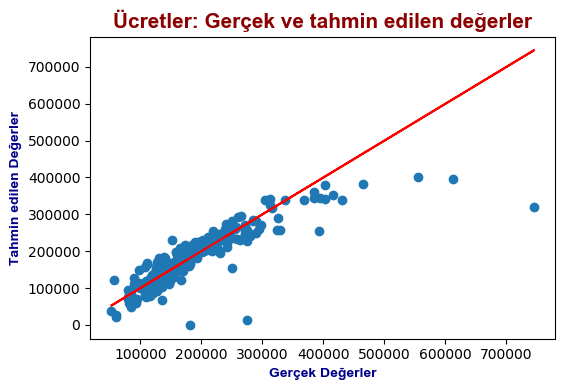

Ortalama Mutlak Hata (MAE)        : 22680.96267509236
Ortalama Kare Hata (MSE)          : 1877205240.2820902
Kök Ortalama Kare Hata (RMSE)     : 43326.72662782281
Ortalama Mutlak Yüzde Hata (MAPE) : 12.559028984316958


In [27]:
#Şimdi tahminleri alma zamanı! statsmodels'deki, 'predict()' fonksiyonunu aşağıdaki gibi çağırıp tahminler yapalım
X_test = sm.add_constant(X_test)

y_preds = sonuclar.predict(X_test)







baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(dpi = 100)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Gerçek Değerler", fontdict=eksen_font)
plt.ylabel("Tahmin edilen Değerler", fontdict=eksen_font)
plt.title("Ücretler: Gerçek ve tahmin edilen değerler", fontdict=baslik_font)
plt.show()

print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_preds)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_preds)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_preds)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

In [35]:
model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

model.score(X_test, y_test)


0.7409095642611514